In [1]:
%gui qt5

from ib_insync import *
util.useQt()

ib = IB()
ib.connect('127.0.0.1', 7497, clientId=14)

In [2]:
contract = Stock('TSLA', 'SMART', 'USD')

bars = ib.reqHistoricalData(
        contract,
        endDateTime='',
        durationStr='60 D',
        barSizeSetting='1 hour',
        whatToShow='TRADES',
        useRTH=True,
        formatDate=1)

In [3]:
bars[0]

BarData(date=datetime.datetime(2017, 4, 17, 15, 30), open=302.6, high=304.0, low=298.68, close=300.62, volume=9620, barCount=4432, average=300.799)

In [4]:
df = util.df(bars)

display(df.head())
display(df.tail())

,date,open,high,low,close,volume,barCount,average
0,2017-04-17 15:30:00,302.60,304.00,298.68,300.62,9620,4432,300.799
1,2017-04-17 16:00:00,300.48,302.41,299.67,300.91,5452,3298,300.987
2,2017-04-17 17:00:00,300.97,303.00,300.78,302.48,4192,2088,302.078
3,2017-04-17 18:00:00,302.51,302.56,300.94,301.15,1994,1173,301.813
4,2017-04-17 19:00:00,301.21,301.47,300.68,301.00,4467,1319,301.002


,date,open,high,low,close,volume,barCount,average
412,2017-07-11 17:00:00,325.30,326.56,321.22,323.48,17987,9596,324.239
413,2017-07-11 18:00:00,323.60,324.60,321.79,323.78,7135,3445,323.184
414,2017-07-11 19:00:00,323.86,325.35,322.60,324.39,5947,3088,323.808
415,2017-07-11 20:00:00,324.39,325.11,323.60,324.58,4660,2543,324.283
416,2017-07-11 21:00:00,324.58,327.28,323.71,327.19,14906,8335,325.885


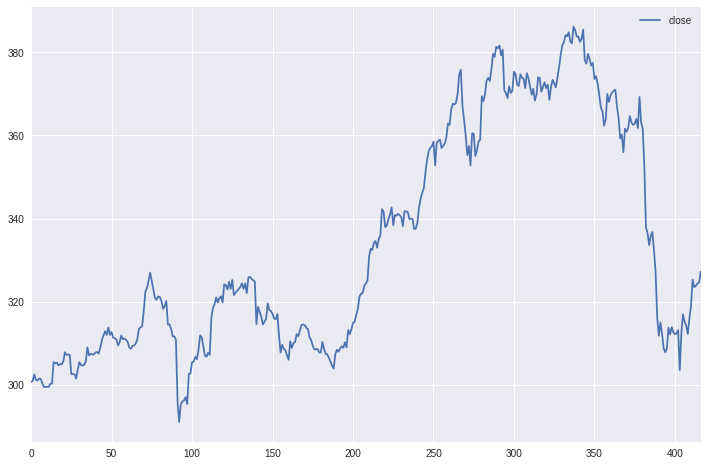

In [5]:
%matplotlib inline
import seaborn as sns

df.plot(y='close', figsize=(12,8))